In [1]:
#import libraries
import numpy as np # math arrays manipulation
import pandas as pd # for data management
from matplotlib import pyplot as plt # for plot
import statsmodels.api as sm

In [2]:
subset_data1 = pd.read_csv('subset_1.csv',chunksize = 1000000)
for data in subset_data1:
    print(data.info())
    break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [3]:
data_sub1 = data.drop(data.columns[[0, 1, 2, 3, 13]], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0.2            1000000 non-null  int64  
 1   Unnamed: 0.1            1000000 non-null  int64  
 2   Unnamed: 0              1000000 non-null  int64  
 3   Unnamed: 0_x            1000000 non-null  int64  
 4   day                     1000000 non-null  int64  
 5   order_id                1000000 non-null  int64  
 6   item_det_info           1000000 non-null  object 
 7   pay_timestamp           1000000 non-null  object 
 8   buyer_id                1000000 non-null  int64  
 9   promise_speed           235397 non-null   float64
 10  if_cainiao              1000000 non-null  int64  
 11  merchant_id             1000000 non-null  int64  
 12  Logistics_review_score  353537 non-null   float64
 13  Unnamed: 0_y            1000000 non-null  int64  
 14  ord

In [4]:
#Missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data_sub1)

Your selected dataframe has 17 columns and 1000000 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
promise_speed,122091,764603,76.5,886694,88.7,float64
Logistics_review_score,0,646463,64.6,646463,64.6,float64
city_id,0,448166,44.8,448166,44.8,float64
facility_type,0,280528,28.1,280528,28.1,float64
facility_id,0,273333,27.3,273333,27.3,float64


In [5]:
#imputing missing values as mode of data
data_sub1['promise_speed'] = data_sub1['promise_speed'].fillna(data_sub1['promise_speed'].mode()[0])
data_sub1['Logistics_review_score'] = data_sub1['Logistics_review_score'].fillna(data_sub1['Logistics_review_score'].mode()[0])
data_sub1.head()

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,SIGNED,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,GOT,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,TRADE_SUCCESS,NaN,NaN,NaN,149,2017-01-07 16:38:00


In [6]:
missing_zero_values_table(data_sub1)

Your selected dataframe has 17 columns and 1000000 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
city_id,0,448166,44.8,448166,44.8,float64
facility_type,0,280528,28.1,280528,28.1,float64
facility_id,0,273333,27.3,273333,27.3,float64


In [7]:
test = data_sub1.loc[data_sub1['buyer_id'] == 35835925]
##test_pivot = data_sub1.pivot(test,columns=['promise_speed','action','logistic_order_id'])
#test = test.groupby('action')
#test.describe()
#test.head(5)
type(test)
test.to_excel('test.xlsx')

In [8]:
data_sub1

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,SIGNED,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,GOT,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,CONSIGN,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,TRADE_SUCCESS,NaN,NaN,NaN,149,2017-01-07 16:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,DEPARTURE,68610.0,2.0,NaN,625,2017-02-05 20:09:00
999996,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,ARRIVAL,146730.0,2.0,NaN,625,2017-02-06 00:03:00
999997,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,DEPARTURE,72849.0,2.0,NaN,625,2017-02-06 08:14:00
999998,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,DEPARTURE,71114.0,2.0,NaN,625,2017-02-03 20:48:00


In [9]:
d = {"ARRIVAL'" : 1, "CONSIGN" : 2, "FAILURE" : 3,"GOT" : 4, "SENT_SCAN" : 5, "SIGNED" : 6, "TRADE_SUCCESS" : 7}
data_sub1['action'] = data_sub1['action'].map(d)

In [10]:
data_sub1

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,6.0,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,2.0,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,4.0,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,2.0,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,7.0,NaN,NaN,NaN,149,2017-01-07 16:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,68610.0,2.0,NaN,625,2017-02-05 20:09:00
999996,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,146730.0,2.0,NaN,625,2017-02-06 00:03:00
999997,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,72849.0,2.0,NaN,625,2017-02-06 08:14:00
999998,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,71114.0,2.0,NaN,625,2017-02-03 20:48:00


In [11]:
data_sub1

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,6.0,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,2.0,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,4.0,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,2.0,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,7.0,NaN,NaN,NaN,149,2017-01-07 16:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,68610.0,2.0,NaN,625,2017-02-05 20:09:00
999996,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,146730.0,2.0,NaN,625,2017-02-06 00:03:00
999997,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,72849.0,2.0,NaN,625,2017-02-06 08:14:00
999998,20170122,840725,81509:1:18.81,2017-01-22 13:45:00,24262182,0.0,0,442,5.0,20170122,44030179,NaN,71114.0,2.0,NaN,625,2017-02-03 20:48:00


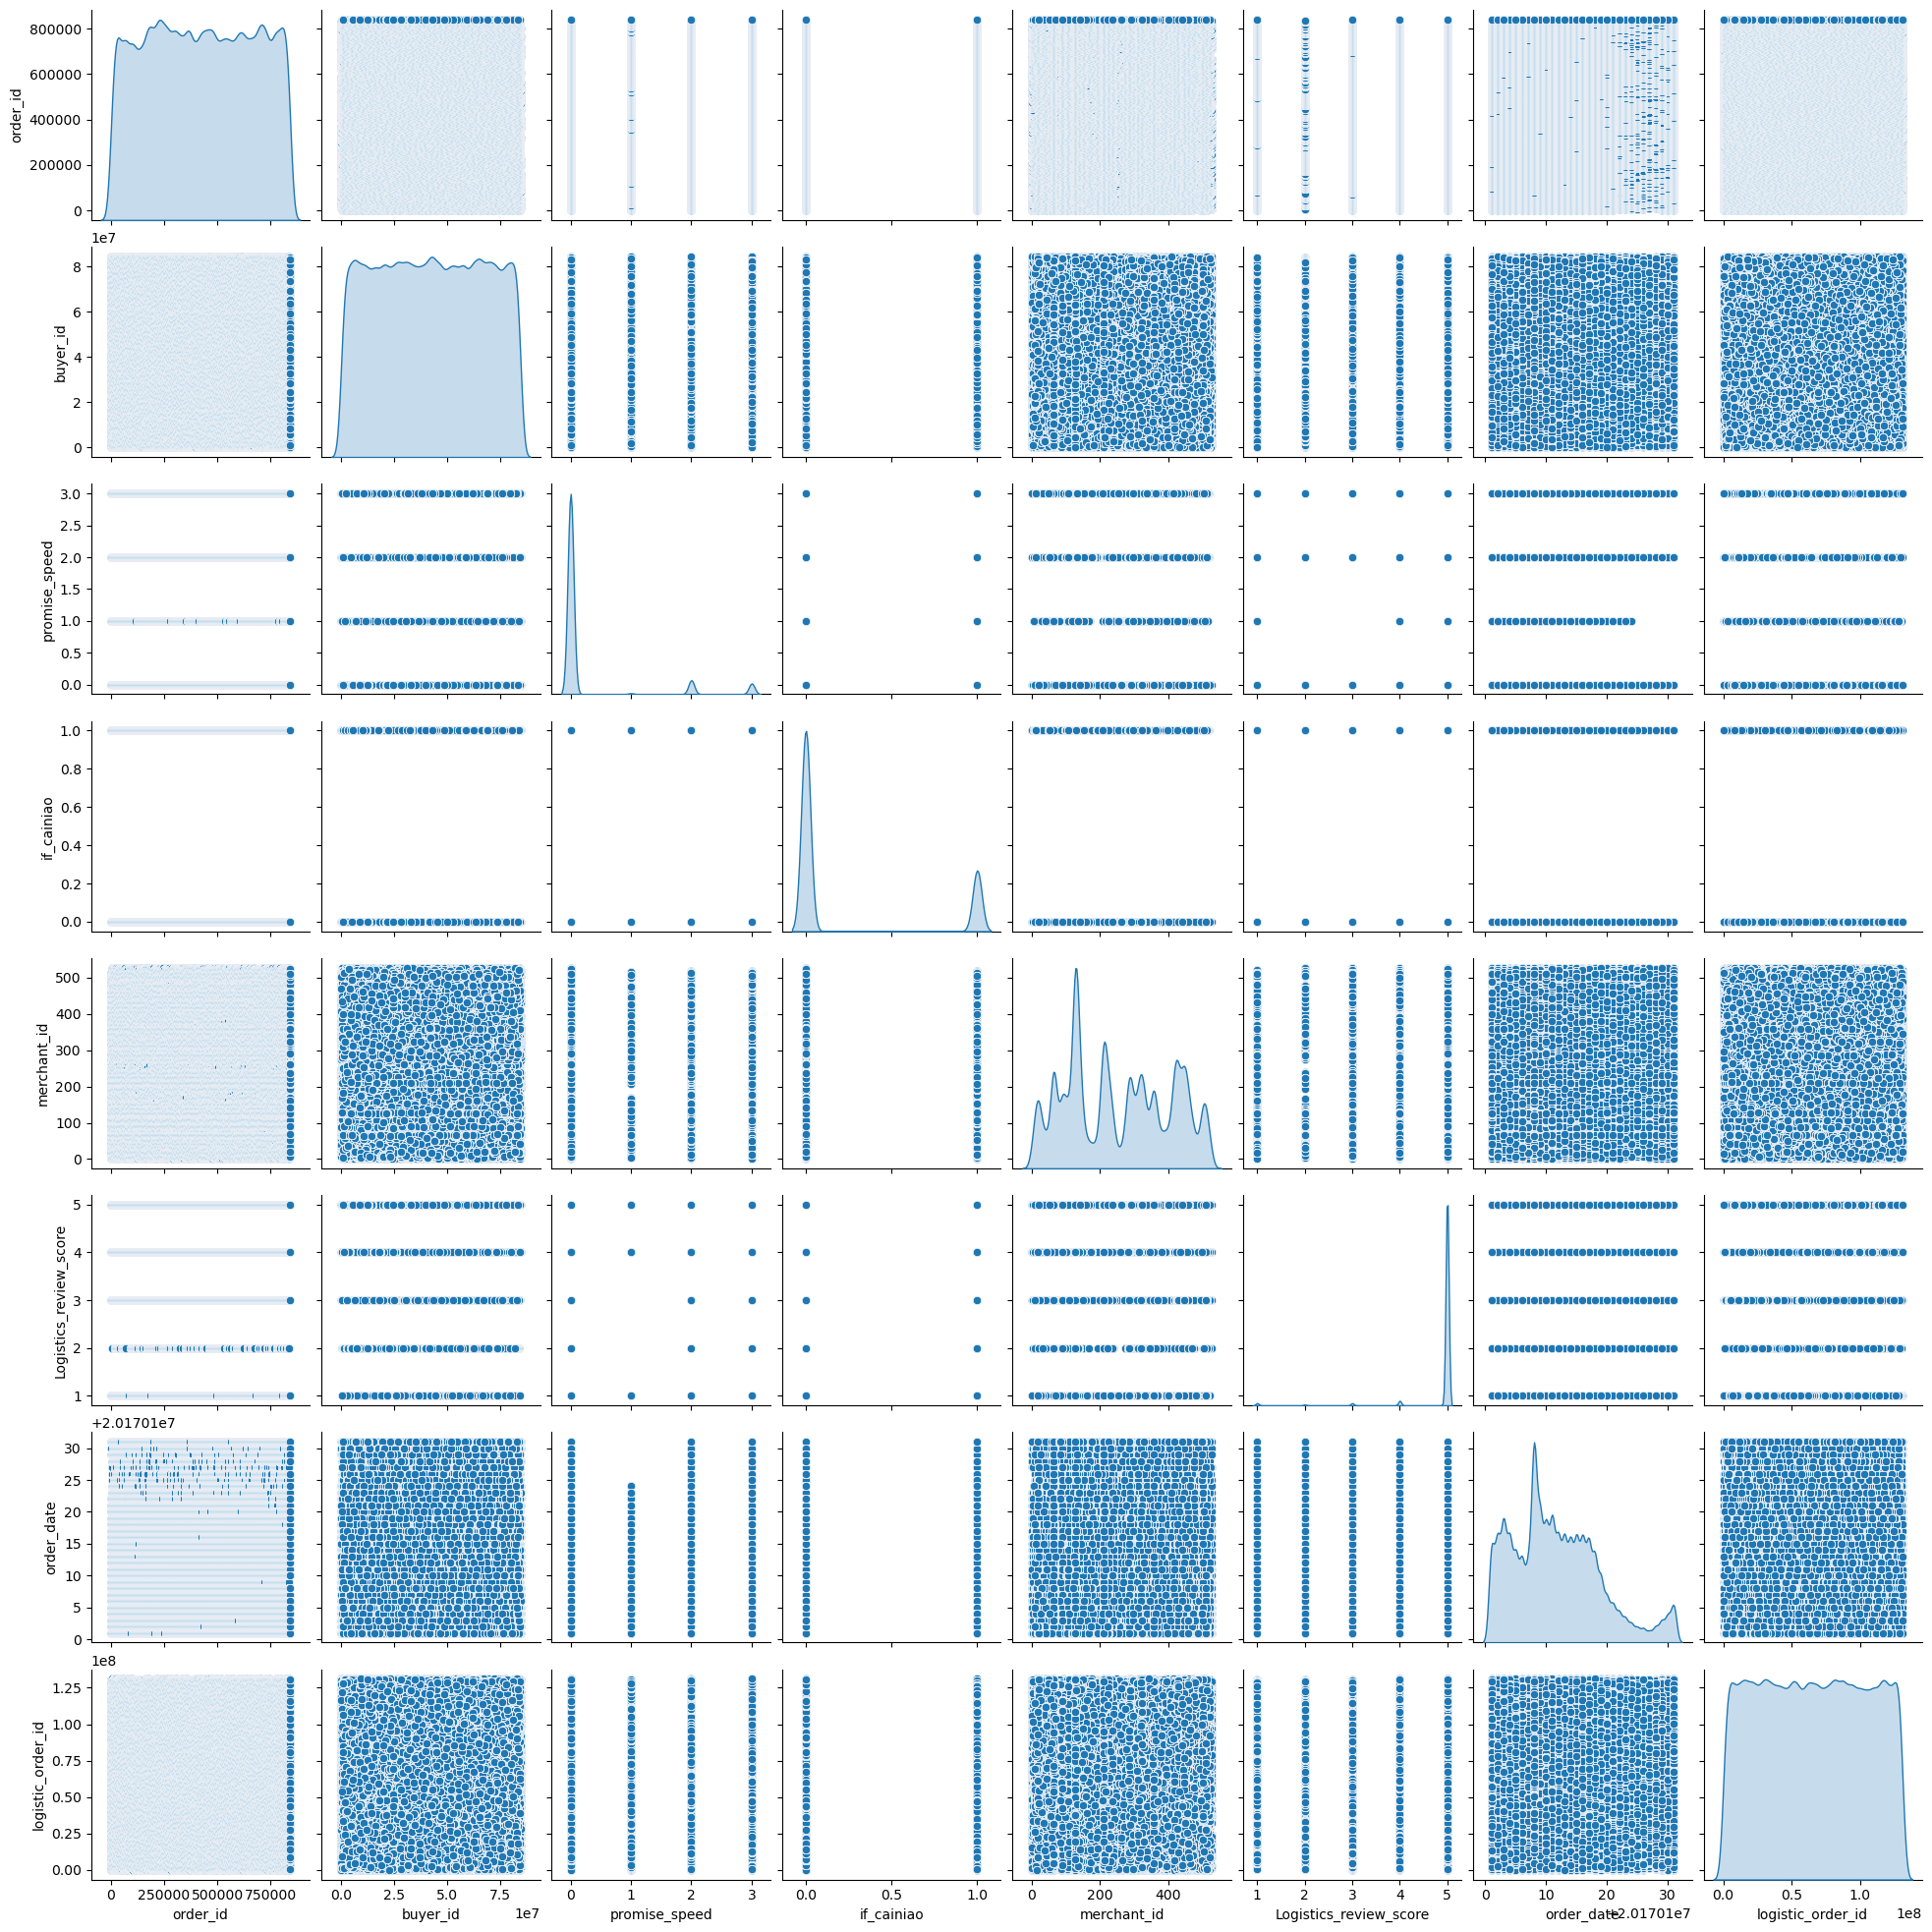

In [12]:
import seaborn as sns
sns.pairplot(data_sub1.iloc[:,1:11],diag_kind='kde')

In [13]:
sns.pairplot(data_sub1.iloc[:,1:11],diag_kind='hist')

In [14]:
data_sub1.head()

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,6.0,26828.0,1.0,234.0,149,2017-01-04 10:28:00
1,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,2.0,NaN,NaN,NaN,149,2017-01-03 20:42:00
2,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,4.0,80222.0,2.0,234.0,149,2017-01-03 22:52:00
3,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,2.0,NaN,NaN,NaN,149,2017-01-03 20:42:00
4,20170103,23,220866:1:252.16,2017-01-03 19:00:00,35835925,2.0,1,78,5.0,20170103,47522654,7.0,NaN,NaN,NaN,149,2017-01-07 16:38:00


In [15]:
data_sub1.corr()

,day,order_id,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id
day,1.000000,-0.001427,0.001642,0.000230,-0.010586,0.002983,-0.020952,1.000000,0.003005,-0.010460,-0.003320,0.094001,0.005536,0.181494
order_id,-0.001427,1.000000,-0.002533,0.002298,0.002589,0.007439,0.004308,-0.001427,-0.002960,0.000001,0.000078,-0.003907,0.006856,-0.004078
buyer_id,0.001642,-0.002533,1.000000,0.001737,0.000305,0.003392,-0.001168,0.001642,-0.003414,-0.000329,0.000724,0.001412,0.003426,0.000342
promise_speed,0.000230,0.002298,0.001737,1.000000,0.560114,0.015067,0.021163,0.000230,-0.006160,-0.064998,-0.022211,0.039719,0.027699,-0.043990
if_cainiao,-0.010586,0.002589,0.000305,0.560114,1.000000,0.042211,0.016522,-0.010586,-0.004758,-0.094614,-0.037574,0.064469,0.081152,0.065224
merchant_id,0.002983,0.007439,0.003392,0.015067,0.042211,1.000000,-0.002373,0.002983,0.008821,-0.007956,-0.024268,0.002740,0.002726,0.003225
Logistics_review_score,-0.020952,0.004308,-0.001168,0.021163,0.016522,-0.002373,1.000000,-0.020952,-0.001791,-0.002261,0.006420,-0.015543,0.004614,-0.011268
order_date,1.000000,-0.001427,0.001642,0.000230,-0.010586,0.002983,-0.020952,1.000000,0.003005,-0.010460,-0.003320,0.094001,0.005536,0.181494
logistic_order_id,0.003005,-0.002960,-0.003414,-0.006160,-0.004758,0.008821,-0.001791,0.003005,1.000000,0.000618,-0.000628,0.002481,-0.000267,0.003021
action,-0.010460,0.000001,-0.000329,-0.064998,-0.094614,-0.007956,-0.002261,-0.010460,0.000618,1.000000,0.009341,-0.133083,0.029820,0.004161


In [16]:
data_sub1 = data_sub1.fillna(0)

In [17]:
#train-test split
from sklearn.model_selection import train_test_split

subsplit_train, subsplit_test = train_test_split(data_sub1, test_size=0.3, random_state=88)
#random_state: Controls the shuffling applied to the data before applying the split. 
#              Pass an int for reproducible output across multiple function calls.


subsplit_train.shape, subsplit_test.shape

((700000, 17), (300000, 17))

In [18]:
#running linear regression after excel pivots
cols = ['if_cainiao','day','promise_speed', 'action','facility_id','logistic_order_id']
X_train = subsplit_train[cols]
y_train = subsplit_train['Logistics_review_score']

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# Fit the data to the model
model1 = sm.OLS(y_train, X_train).fit() #ordinary least square
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     Logistics_review_score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     119.4
Date:                    Thu, 16 Mar 2023   Prob (F-statistic):          2.27e-151
Time:                            00:25:29   Log-Likelihood:            -5.0600e+05
No. Observations:                  700000   AIC:                         1.012e+06
Df Residuals:                      699993   BIC:                         1.012e+06
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [19]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['if_cainiao','day','promise_speed', 'action','facility_id','logistic_order_id','merchant_id','city_id','logistic_company_id']
VIF(subsplit_train, cols)

/Users/vaishnavikilambi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


if_cainiao             1.525337
day                    1.046423
promise_speed          1.491836
action                 1.058815
facility_id            1.265243
logistic_order_id      1.000144
merchant_id            1.002325
city_id                1.313138
logistic_company_id    1.124278
dtype: float64

In [20]:
import statsmodels.formula.api as smf
model_speed = smf.ols("Logistics_review_score ~ promise_speed+if_cainiao+logistic_company_id+facility_id*city_id*merchant_id",subsplit_train).fit() 
print(model_speed.summary())

                              OLS Regression Results                              
Dep. Variable:     Logistics_review_score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     78.96
Date:                    Thu, 16 Mar 2023   Prob (F-statistic):          4.34e-163
Time:                            00:25:30   Log-Likelihood:            -5.0596e+05
No. Observations:                  700000   AIC:                         1.012e+06
Df Residuals:                      699989   BIC:                         1.012e+06
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [21]:
import statsmodels.formula.api as smf
model_speed = smf.ols("Logistics_review_score ~ promise_speed+if_cainiao+day+logistic_company_id+facility_id*merchant_id",subsplit_train).fit() 
print(model_speed.summary())

                              OLS Regression Results                              
Dep. Variable:     Logistics_review_score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     106.2
Date:                    Thu, 16 Mar 2023   Prob (F-statistic):          3.80e-156
Time:                            00:25:31   Log-Likelihood:            -5.0599e+05
No. Observations:                  700000   AIC:                         1.012e+06
Df Residuals:                      699992   BIC:                         1.012e+06
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [22]:
import statsmodels.formula.api as smf
model_3 = smf.ols("Logistics_review_score ~ promise_speed+if_cainiao+day+action+logistic_company_id*merchant_id",subsplit_train).fit() 
print(model_3.summary())

                              OLS Regression Results                              
Dep. Variable:     Logistics_review_score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     107.3
Date:                    Thu, 16 Mar 2023   Prob (F-statistic):          8.68e-158
Time:                            00:25:31   Log-Likelihood:            -5.0598e+05
No. Observations:                  700000   AIC:                         1.012e+06
Df Residuals:                      699992   BIC:                         1.012e+06
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [23]:
import statsmodels.formula.api as smf
model_3 = smf.ols("Logistics_review_score ~ promise_speed+if_cainiao+day+action",subsplit_train).fit() 
print(model_3.summary())

                              OLS Regression Results                              
Dep. Variable:     Logistics_review_score   R-squared:                       0.001
Model:                                OLS   Adj. R-squared:                  0.001
Method:                     Least Squares   F-statistic:                     175.8
Date:                    Thu, 16 Mar 2023   Prob (F-statistic):          8.46e-151
Time:                            00:25:31   Log-Likelihood:            -5.0601e+05
No. Observations:                  700000   AIC:                         1.012e+06
Df Residuals:                      699995   BIC:                         1.012e+06
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

In [24]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [ ]:
# compute out-of-sample R squared
OSR2(model_3, subsplit_train, subsplit_test, 'Logistics_review_score')

In [ ]:
#Building CART
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_split=10, 
                            ccp_alpha=0.02,
                            random_state = 88)
X_train = 
dtr = dtr.fit(X_train, y_train)